In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

In [173]:
pd.set_option('display.max_columns',None)

In [174]:
data1=pd.read_csv(r"C:\Users\admin\Desktop\Project data\VSPA\MoviesOnStreamingPlatforms_updated.csv", index_col = 0)

In [175]:
data2=pd.read_csv(r"C:\Users\admin\Desktop\Project data\VSPA\tv_shows.csv", index_col = 0)

In [176]:
data1

ID                           Title  Year  Age  IMDb Rotten Tomatoes  \
0          1                       Inception  2010  13+   8.8             87%   
1          2                      The Matrix  1999  13+   8.7             87%   
2          3          Avengers: Infinity War  2018  13+   8.5             84%   
3          4              Back to the Future  1985  13+   8.5             96%   
4          5  The Good, the Bad and the Ugly  1966  13+   8.8             97%   
...      ...                             ...   ...  ...   ...             ...   
16739  16740       The Ghosts of Buxley Hall  1980  NaN   6.2             NaN   
16740  16741                  The Poof Point  2001   7+   4.7             NaN   
16741  16742           Sharks of Lost Island  2013  NaN   5.7             NaN   
16742  16743              Man Among Cheetahs  2017  NaN   6.6             NaN   
16743  16744                In Beaver Valley  1950  NaN   NaN             NaN   

       Netflix  Hulu  Prime Video  Disney  Type  \
0            1     0            0       0     0   
1            1     0            0       0     0   
2            1     0            0       0     0   
3            1     0            0       0     0   
4            1     0            1       0     0   
...        ...   ...          ...     ...   ...   
16739        0     0            0       1     0   
16740        0     0            0       1     0   
16741        0     0            0       1     0   
16742        0     0            0       1     0   
16743        0     0            0       1     0   

                            Directors                            Genres  \
0                   Christopher Nolan  Action,Adventure,Sci-Fi,Thriller   
1      Lana Wachowski,Lilly Wachowski                     Action,Sci-Fi   
2             Anthony Russo,Joe Russo           Action,Adventure,Sci-Fi   
3                     Robert Zemeckis           Adventure,Comedy,Sci-Fi   
4                        Sergio Leone                           Western   
...                               ...                               ...   
16739                    Bruce Bilson      Comedy,Family,Fantasy,Horror   
16740                     Neal Israel              Comedy,Family,Sci-Fi   
16741                    Neil Gelinas                       Documentary   
16742            Richard Slater-Jones                       Documentary   
16743                     James Algar          Documentary,Short,Family   

                            Country                 Language  Runtime  
0      United States,United Kingdom  English,Japanese,French    148.0  
1                     United States                  English    136.0  
2                     United States                  English    149.0  
3                     United States                  English    116.0  
4          Italy,Spain,West Germany                  Italian    161.0  
...                             ...                      ...      ...  
16739                 United States                  English    120.0  
16740                 United States                  English     90.0  
16741                 United States                  English      NaN  
16742                 United States                  English      NaN  
16743                 United States                  English     32.0  

[16744 rows x 16 columns]

In [177]:
data2

Title  Year  Age  IMDb Rotten Tomatoes  \
0                        Breaking Bad  2008  18+   9.5             96%   
1                     Stranger Things  2016  16+   8.8             93%   
2                         Money Heist  2017  18+   8.4             91%   
3                            Sherlock  2010  16+   9.1             78%   
4                    Better Call Saul  2015  18+   8.7             97%   
...                               ...   ...  ...   ...             ...   
5606  Tut's Treasures: Hidden Secrets  2018  NaN   NaN             NaN   
5607                 Paradise Islands  2017  NaN   NaN             NaN   
5608                      Wild Russia  2018  NaN   NaN             NaN   
5609                      Love & Vets  2017  NaN   NaN             NaN   
5610         United States of Animals  2016  NaN   NaN             NaN   

      Netflix  Hulu  Prime Video  Disney  Type  
0           1     0            0       0     1  
1           1     0            0       0     1  
2           1     0            0       0     1  
3           1     0            0       0     1  
4           1     0            0       0     1  
...       ...   ...          ...     ...   ...  
5606        0     0            0       1     1  
5607        0     0            0       1     1  
5608        0     0            0       1     1  
5609        0     0            0       1     1  
5610        0     0            0       1     1  

[5611 rows x 10 columns]

In [178]:
data = pd.concat([data1, data2])

data

ID                            Title  Year  Age  IMDb Rotten Tomatoes  \
0     1.0                        Inception  2010  13+   8.8             87%   
1     2.0                       The Matrix  1999  13+   8.7             87%   
2     3.0           Avengers: Infinity War  2018  13+   8.5             84%   
3     4.0               Back to the Future  1985  13+   8.5             96%   
4     5.0   The Good, the Bad and the Ugly  1966  13+   8.8             97%   
...   ...                              ...   ...  ...   ...             ...   
5606  NaN  Tut's Treasures: Hidden Secrets  2018  NaN   NaN             NaN   
5607  NaN                 Paradise Islands  2017  NaN   NaN             NaN   
5608  NaN                      Wild Russia  2018  NaN   NaN             NaN   
5609  NaN                      Love & Vets  2017  NaN   NaN             NaN   
5610  NaN         United States of Animals  2016  NaN   NaN             NaN   

      Netflix  Hulu  Prime Video  Disney  Type  \
0           1     0            0       0     0   
1           1     0            0       0     0   
2           1     0            0       0     0   
3           1     0            0       0     0   
4           1     0            1       0     0   
...       ...   ...          ...     ...   ...   
5606        0     0            0       1     1   
5607        0     0            0       1     1   
5608        0     0            0       1     1   
5609        0     0            0       1     1   
5610        0     0            0       1     1   

                           Directors                            Genres  \
0                  Christopher Nolan  Action,Adventure,Sci-Fi,Thriller   
1     Lana Wachowski,Lilly Wachowski                     Action,Sci-Fi   
2            Anthony Russo,Joe Russo           Action,Adventure,Sci-Fi   
3                    Robert Zemeckis           Adventure,Comedy,Sci-Fi   
4                       Sergio Leone                           Western   
...                              ...                               ...   
5606                             NaN                               NaN   
5607                             NaN                               NaN   
5608                             NaN                               NaN   
5609                             NaN                               NaN   
5610                             NaN                               NaN   

                           Country                 Language  Runtime  
0     United States,United Kingdom  English,Japanese,French    148.0  
1                    United States                  English    136.0  
2                    United States                  English    149.0  
3                    United States                  English    116.0  
4         Italy,Spain,West Germany                  Italian    161.0  
...                            ...                      ...      ...  
5606                           NaN                      NaN      NaN  
5607                           NaN                      NaN      NaN  
5608                           NaN                      NaN      NaN  
5609                           NaN                      NaN      NaN  
5610                           NaN                      NaN      NaN  

[22355 rows x 16 columns]

In [179]:
data.dtypes

ID                 float64
Title               object
Year                 int64
Age                 object
IMDb               float64
Rotten Tomatoes     object
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney               int64
Type                 int64
Directors           object
Genres              object
Country             object
Language            object
Runtime            float64
dtype: object

In [180]:
pd.isnull(data).sum()

ID                  5611
Title                  0
Year                   0
Age                11836
IMDb                1732
Rotten Tomatoes    16186
Netflix                0
Hulu                   0
Prime Video            0
Disney                 0
Type                   0
Directors           6337
Genres              5886
Country             6046
Language            6210
Runtime             6203
dtype: int64

In [181]:
data.Age = data.Age.fillna('Unknown')

In [182]:
data.Age.value_counts()

Unknown    11836
18+         4204
7+          2305
all         1388
16+         1338
13+         1284
Name: Age, dtype: int64

In [183]:
#filling NaN values with 0
data.IMDb = data.IMDb.fillna(0)

In [184]:
data.describe()

ID          Year          IMDb       Netflix          Hulu  \
count  16744.000000  22355.000000  22355.000000  22355.000000  22355.000000   
mean    8372.500000   2005.023753      5.686388      0.245627      0.118855   
std     4833.720789     19.041756      2.124591      0.430468      0.323625   
min        1.000000   1901.000000      0.000000      0.000000      0.000000   
25%     4186.750000   2004.000000      5.000000      0.000000      0.000000   
50%     8372.500000   2013.000000      6.200000      0.000000      0.000000   
75%    12558.250000   2016.000000      7.100000      0.000000      0.000000   
max    16744.000000   2020.000000      9.600000      1.000000      1.000000   

        Prime Video        Disney          Type       Runtime  
count  22355.000000  22355.000000  22355.000000  16152.000000  
mean       0.648535      0.033281      0.250995     93.413447  
std        0.477439      0.179374      0.433596     28.219222  
min        0.000000      0.000000      0.000000      1.000000  
25%        0.000000      0.000000      0.000000     82.000000  
50%        1.000000      0.000000      0.000000     92.000000  
75%        1.000000      0.000000      1.000000    104.000000  
max        1.000000      1.000000      1.000000   1256.000000

In [185]:
#Checking if there are movies with more than 300 minutes of runtime
data[data.Runtime > 300]

ID                 Title  Year      Age  IMDb Rotten Tomatoes  \
4405    4406.0    Law of the Lawless  1964  Unknown   6.1             NaN   
12475  12476.0              Scarlett  2016      16+   4.4             NaN   
13048  13049.0   Custer's Last Stand  1936  Unknown   4.6             NaN   
13115  13116.0  Carlos el terrorista  1980  Unknown   6.1             NaN   
13179  13180.0              Colorado  1940      all   5.9             NaN   
14113  14114.0      The Inner Circle  2009  Unknown   6.6             NaN   
15295  15296.0   The Vatican Museums  2007  Unknown   5.0             NaN   

       Netflix  Hulu  Prime Video  Disney  Type      Directors  \
4405         0     1            1       0     0            NaN   
12475        0     0            1       0     0            NaN   
13048        0     0            1       0     0  Elmer Clifton   
13115        0     0            1       0     0            NaN   
13179        0     0            1       0     0            NaN   
14113        0     0            1       0     0            NaN   
15295        0     0            1       0     0   Luca De Mata   

                                       Genres  \
4405                       Action,Crime,Drama   
12475                           Drama,Romance   
13048   Adventure,History,Romance,War,Western   
13115          Biography,Crime,Drama,Thriller   
13179  Action,Adventure,Drama,Romance,Western   
14113                                   Drama   
15295                                     NaN   

                                                 Country  \
4405                                              Russia   
12475  France,United States,Germany,Italy,United King...   
13048                                      United States   
13115                                     France,Germany   
13179                                      United States   
14113                                             Sweden   
15295                                              Italy   

                                                Language  Runtime  
4405                                             Russian    750.0  
12475                                            English    360.0  
13048                                            English    328.0  
13115  English,Arabic,German,Spanish,French,Hungarian...    334.0  
13179                                            English   1256.0  
14113                                            Swedish    360.0  
15295                                            English    410.0

In [186]:
data.loc[data.Title == 'Law of the Lawless', ['Runtime']] = 87
data.loc[data.Title == 'Scarlett', ['Runtime']] = 92
data.loc[data.Title == 'Carlos el terrorista', ['Runtime']] = 97
data.loc[data.Title == 'Colorado', ['Runtime']] = 57
data.loc[data.Title == 'The Inner Circle', ['Runtime']] = 96

In [187]:
data.describe()

ID          Year          IMDb       Netflix          Hulu  \
count  16744.000000  22355.000000  22355.000000  22355.000000  22355.000000   
mean    8372.500000   2005.023753      5.686388      0.245627      0.118855   
std     4833.720789     19.041756      2.124591      0.430468      0.323625   
min        1.000000   1901.000000      0.000000      0.000000      0.000000   
25%     4186.750000   2004.000000      5.000000      0.000000      0.000000   
50%     8372.500000   2013.000000      6.200000      0.000000      0.000000   
75%    12558.250000   2016.000000      7.100000      0.000000      0.000000   
max    16744.000000   2020.000000      9.600000      1.000000      1.000000   

        Prime Video        Disney          Type       Runtime  
count  22355.000000  22355.000000  22355.000000  16152.000000  
mean       0.648535      0.033281      0.250995     93.250557  
std        0.477439      0.179374      0.433596     25.954224  
min        0.000000      0.000000      0.000000      1.000000  
25%        0.000000      0.000000      0.000000     82.000000  
50%        1.000000      0.000000      0.000000     92.000000  
75%        1.000000      0.000000      1.000000    104.000000  
max        1.000000      1.000000      1.000000    410.000000

In [188]:
data.Language = data.Language.fillna('Unknown')

In [189]:
pd.isnull(data).sum()

ID                  5611
Title                  0
Year                   0
Age                    0
IMDb                   0
Rotten Tomatoes    16186
Netflix                0
Hulu                   0
Prime Video            0
Disney                 0
Type                   0
Directors           6337
Genres              5886
Country             6046
Language               0
Runtime             6203
dtype: int64

In [190]:
data['Runtime'] = data['Runtime'].replace(np.nan, 0)

In [191]:
data

ID                            Title  Year      Age  IMDb  \
0     1.0                        Inception  2010      13+   8.8   
1     2.0                       The Matrix  1999      13+   8.7   
2     3.0           Avengers: Infinity War  2018      13+   8.5   
3     4.0               Back to the Future  1985      13+   8.5   
4     5.0   The Good, the Bad and the Ugly  1966      13+   8.8   
...   ...                              ...   ...      ...   ...   
5606  NaN  Tut's Treasures: Hidden Secrets  2018  Unknown   0.0   
5607  NaN                 Paradise Islands  2017  Unknown   0.0   
5608  NaN                      Wild Russia  2018  Unknown   0.0   
5609  NaN                      Love & Vets  2017  Unknown   0.0   
5610  NaN         United States of Animals  2016  Unknown   0.0   

     Rotten Tomatoes  Netflix  Hulu  Prime Video  Disney  Type  \
0                87%        1     0            0       0     0   
1                87%        1     0            0       0     0   
2                84%        1     0            0       0     0   
3                96%        1     0            0       0     0   
4                97%        1     0            1       0     0   
...              ...      ...   ...          ...     ...   ...   
5606             NaN        0     0            0       1     1   
5607             NaN        0     0            0       1     1   
5608             NaN        0     0            0       1     1   
5609             NaN        0     0            0       1     1   
5610             NaN        0     0            0       1     1   

                           Directors                            Genres  \
0                  Christopher Nolan  Action,Adventure,Sci-Fi,Thriller   
1     Lana Wachowski,Lilly Wachowski                     Action,Sci-Fi   
2            Anthony Russo,Joe Russo           Action,Adventure,Sci-Fi   
3                    Robert Zemeckis           Adventure,Comedy,Sci-Fi   
4                       Sergio Leone                           Western   
...                              ...                               ...   
5606                             NaN                               NaN   
5607                             NaN                               NaN   
5608                             NaN                               NaN   
5609                             NaN                               NaN   
5610                             NaN                               NaN   

                           Country                 Language  Runtime  
0     United States,United Kingdom  English,Japanese,French    148.0  
1                    United States                  English    136.0  
2                    United States                  English    149.0  
3                    United States                  English    116.0  
4         Italy,Spain,West Germany                  Italian    161.0  
...                            ...                      ...      ...  
5606                           NaN                  Unknown      0.0  
5607                           NaN                  Unknown      0.0  
5608                           NaN                  Unknown      0.0  
5609                           NaN                  Unknown      0.0  
5610                           NaN                  Unknown      0.0  

[22355 rows x 16 columns]

In [192]:
data=data.drop(['Rotten Tomatoes','ID'],axis=1)
data

Title  Year      Age  IMDb  Netflix  Hulu  \
0                           Inception  2010      13+   8.8        1     0   
1                          The Matrix  1999      13+   8.7        1     0   
2              Avengers: Infinity War  2018      13+   8.5        1     0   
3                  Back to the Future  1985      13+   8.5        1     0   
4      The Good, the Bad and the Ugly  1966      13+   8.8        1     0   
...                               ...   ...      ...   ...      ...   ...   
5606  Tut's Treasures: Hidden Secrets  2018  Unknown   0.0        0     0   
5607                 Paradise Islands  2017  Unknown   0.0        0     0   
5608                      Wild Russia  2018  Unknown   0.0        0     0   
5609                      Love & Vets  2017  Unknown   0.0        0     0   
5610         United States of Animals  2016  Unknown   0.0        0     0   

      Prime Video  Disney  Type                       Directors  \
0               0       0     0               Christopher Nolan   
1               0       0     0  Lana Wachowski,Lilly Wachowski   
2               0       0     0         Anthony Russo,Joe Russo   
3               0       0     0                 Robert Zemeckis   
4               1       0     0                    Sergio Leone   
...           ...     ...   ...                             ...   
5606            0       1     1                             NaN   
5607            0       1     1                             NaN   
5608            0       1     1                             NaN   
5609            0       1     1                             NaN   
5610            0       1     1                             NaN   

                                Genres                       Country  \
0     Action,Adventure,Sci-Fi,Thriller  United States,United Kingdom   
1                        Action,Sci-Fi                 United States   
2              Action,Adventure,Sci-Fi                 United States   
3              Adventure,Comedy,Sci-Fi                 United States   
4                              Western      Italy,Spain,West Germany   
...                                ...                           ...   
5606                               NaN                           NaN   
5607                               NaN                           NaN   
5608                               NaN                           NaN   
5609                               NaN                           NaN   
5610                               NaN                           NaN   

                     Language  Runtime  
0     English,Japanese,French    148.0  
1                     English    136.0  
2                     English    149.0  
3                     English    116.0  
4                     Italian    161.0  
...                       ...      ...  
5606                  Unknown      0.0  
5607                  Unknown      0.0  
5608                  Unknown      0.0  
5609                  Unknown      0.0  
5610                  Unknown      0.0  

[22355 rows x 14 columns]

Text(0, 0.5, 'platform')

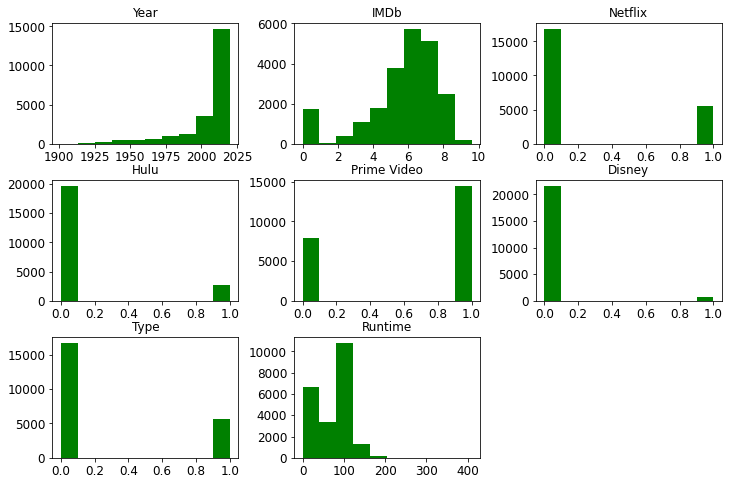

In [193]:
data.hist(grid=False, xlabelsize=12, ylabelsize=12,figsize=(12,8), color = "green")
plt.xlabel("IMDb", fontsize=15)
plt.ylabel("platform",fontsize=10)

In [194]:
data.corr()

Year      IMDb   Netflix      Hulu  Prime Video    Disney  \
Year         1.000000 -0.069976  0.257255  0.099553    -0.273972 -0.041697   
IMDb        -0.069976  1.000000  0.160018  0.070148    -0.191279  0.066431   
Netflix      0.257255  0.160018  1.000000 -0.163330    -0.680440 -0.096606   
Hulu         0.099553  0.070148 -0.163330  1.000000    -0.372374 -0.048109   
Prime Video -0.273972 -0.191279 -0.680440 -0.372374     1.000000 -0.242118   
Disney      -0.041697  0.066431 -0.096606 -0.048109    -0.242118  1.000000   
Type         0.182325 -0.012253  0.132488  0.346569    -0.323045 -0.003877   
Runtime     -0.127271  0.102887 -0.086905 -0.273639     0.253034  0.000309   

                 Type   Runtime  
Year         0.182325 -0.127271  
IMDb        -0.012253  0.102887  
Netflix      0.132488 -0.086905  
Hulu         0.346569 -0.273639  
Prime Video -0.323045  0.253034  
Disney      -0.003877  0.000309  
Type         1.000000 -0.825923  
Runtime     -0.825923  1.000000

In [196]:
data.rename(columns ={'Prime Video':'Prime'},inplace=True)

In [197]:
r = data.sort_values(by='IMDb', ascending=False)
r = r[0:20]
r = r[['Title','IMDb','Netflix','Hulu','Prime','Disney']]
r.style.bar(subset=["Netflix",], color='#ff6b6b')\
                 .bar(subset=["Hulu"], color='#95d5b2')\
                 .bar(subset=["Prime"], color='#a2d2ff')\
                 .bar(subset=["Disney"], color='#72efdd')\
                 .bar(subset=["IMDb"],color='#').background_gradient(cmap='Purples')


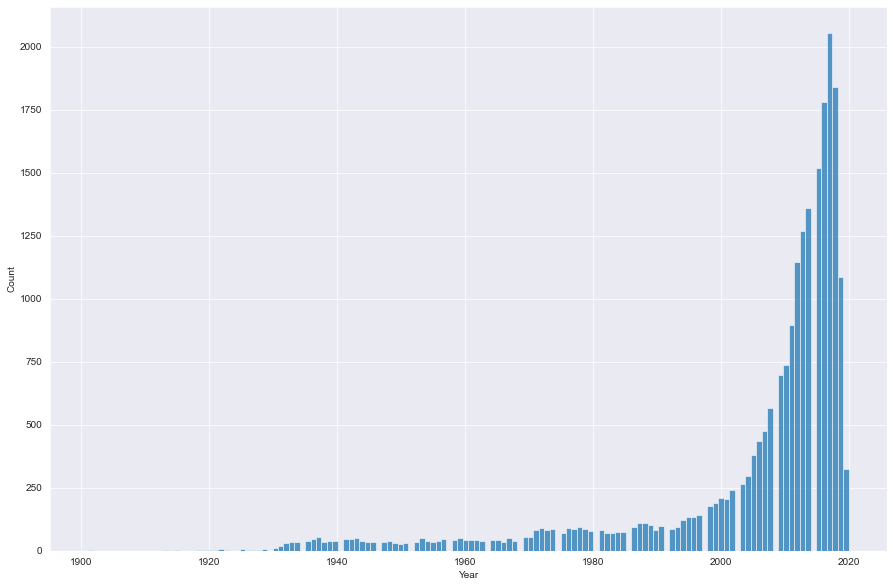

In [198]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,10))
sns.histplot(data.Year,kde=False);

In [199]:
def split_multicolumn(genres):
    result_df = genres.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in genres[genres.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(','):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [200]:
genres_df = split_multicolumn(data.Genres)

movie_genres = genres_df.sum().sort_values(ascending=False)

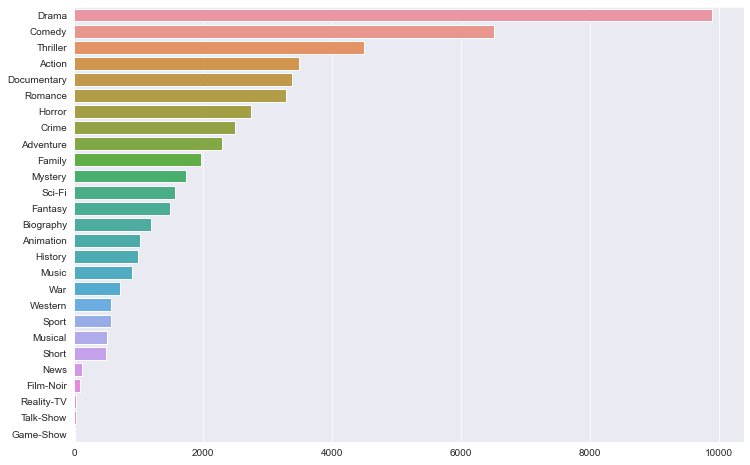

In [201]:
plt.figure(figsize=(12,8))
sns.barplot(x=movie_genres.values, y=movie_genres.index);

In [202]:
data['Netflix'].value_counts()

0    16864
1     5491
Name: Netflix, dtype: int64

In [203]:
one_hot_data = pd.get_dummies(data[['IMDb','Age','Genres','Netflix','Prime','Disney','Hulu']])

In [204]:
one_hot_data

IMDb  Netflix  Prime  Disney  Hulu  Age_13+  Age_16+  Age_18+  Age_7+  \
0      8.8        1      0       0     0        1        0        0       0   
1      8.7        1      0       0     0        1        0        0       0   
2      8.5        1      0       0     0        1        0        0       0   
3      8.5        1      0       0     0        1        0        0       0   
4      8.8        1      1       0     0        1        0        0       0   
...    ...      ...    ...     ...   ...      ...      ...      ...     ...   
5606   0.0        0      0       1     0        0        0        0       0   
5607   0.0        0      0       1     0        0        0        0       0   
5608   0.0        0      0       1     0        0        0        0       0   
5609   0.0        0      0       1     0        0        0        0       0   
5610   0.0        0      0       1     0        0        0        0       0   

      Age_Unknown  Age_all  Genres_Action  Genres_Action,Adventure  \
0               0        0              0                        0   
1               0        0              0                        0   
2               0        0              0                        0   
3               0        0              0                        0   
4               0        0              0                        0   
...           ...      ...            ...                      ...   
5606            1        0              0                        0   
5607            1        0              0                        0   
5608            1        0              0                        0   
5609            1        0              0                        0   
5610            1        0              0                        0   

      Genres_Action,Adventure,Biography  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   
...                                 ...   
5606                                  0   
5607                                  0   
5608                                  0   
5609                                  0   
5610                                  0   

      Genres_Action,Adventure,Biography,Drama,History  \
0                                                   0   
1                                                   0   
2                                                   0   
3                                                   0   
4                                                   0   
...                                               ...   
5606                                                0   
5607                                                0   
5608                                                0   
5609                                                0   
5610                                                0   

      Genres_Action,Adventure,Biography,Drama,History,Romance,War  \
0                                                     0             
1                                                     0             
2                                                     0             
3                                                     0             
4                                                     0             
...                                                 ...             
5606                                                  0             
5607                                                  0             
5608                                                  0             
5609                                                  0             
5610                                                  0             

      Genres_Action,Adventure,Biography,Drama,Romance  \
0                                                   0   
1                                                   0   
2             

In [205]:
one_hot_data = pd.get_dummies(data[['IMDb','Age','Genres','Netflix','Prime','Disney','Hulu']],drop_first=True)
one_hot_data

IMDb  Netflix  Prime  Disney  Hulu  Age_16+  Age_18+  Age_7+  \
0      8.8        1      0       0     0        0        0       0   
1      8.7        1      0       0     0        0        0       0   
2      8.5        1      0       0     0        0        0       0   
3      8.5        1      0       0     0        0        0       0   
4      8.8        1      1       0     0        0        0       0   
...    ...      ...    ...     ...   ...      ...      ...     ...   
5606   0.0        0      0       1     0        0        0       0   
5607   0.0        0      0       1     0        0        0       0   
5608   0.0        0      0       1     0        0        0       0   
5609   0.0        0      0       1     0        0        0       0   
5610   0.0        0      0       1     0        0        0       0   

      Age_Unknown  Age_all  Genres_Action,Adventure  \
0               0        0                        0   
1               0        0                        0   
2               0        0                        0   
3               0        0                        0   
4               0        0                        0   
...           ...      ...                      ...   
5606            1        0                        0   
5607            1        0                        0   
5608            1        0                        0   
5609            1        0                        0   
5610            1        0                        0   

      Genres_Action,Adventure,Biography  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   
...                                 ...   
5606                                  0   
5607                                  0   
5608                                  0   
5609                                  0   
5610                                  0   

      Genres_Action,Adventure,Biography,Drama,History  \
0                                                   0   
1                                                   0   
2                                                   0   
3                                                   0   
4                                                   0   
...                                               ...   
5606                                                0   
5607                                                0   
5608                                                0   
5609                                                0   
5610                                                0   

      Genres_Action,Adventure,Biography,Drama,History,Romance,War  \
0                                                     0             
1                                                     0             
2                                                     0             
3                                                     0             
4                                                     0             
...                                                 ...             
5606                                                  0             
5607                                                  0             
5608                                                  0             
5609                                                  0             
5610                                                  0             

      Genres_Action,Adventure,Biography,Drama,Romance  \
0                                                   0   
1                                                   0   
2                                                   0   
3                                                   0   
4                                                   0   
...                                               ...   
5606                                                0   
5607             

In [237]:
train, test = train_test_split(one_hot_data, test_size =0.20)

In [238]:
c1 = DecisionTreeClassifier(min_samples_split=50)
c2 = DecisionTreeClassifier(min_samples_split=30)

In [239]:
features = [ 'IMDb','Genres_Drama','Genres_Comedy','Genres_Comedy,Drama','Genres_Documentary','Genres_Horror'] 

In [240]:
X_train = train[features]
y_train = train['Netflix']

X_test = test[features]
y_test = test['Netflix']

In [241]:
tree1 = c1.fit(X_train, y_train)
tree2 = c2.fit(X_train, y_train)

In [242]:
y_pred_t1 = c1.predict(X_train)
y_pred_t2 = c2.predict(X_train)

In [243]:
y_pred1 = c1.predict(X_test)
y_pred2 = c2.predict(X_test)

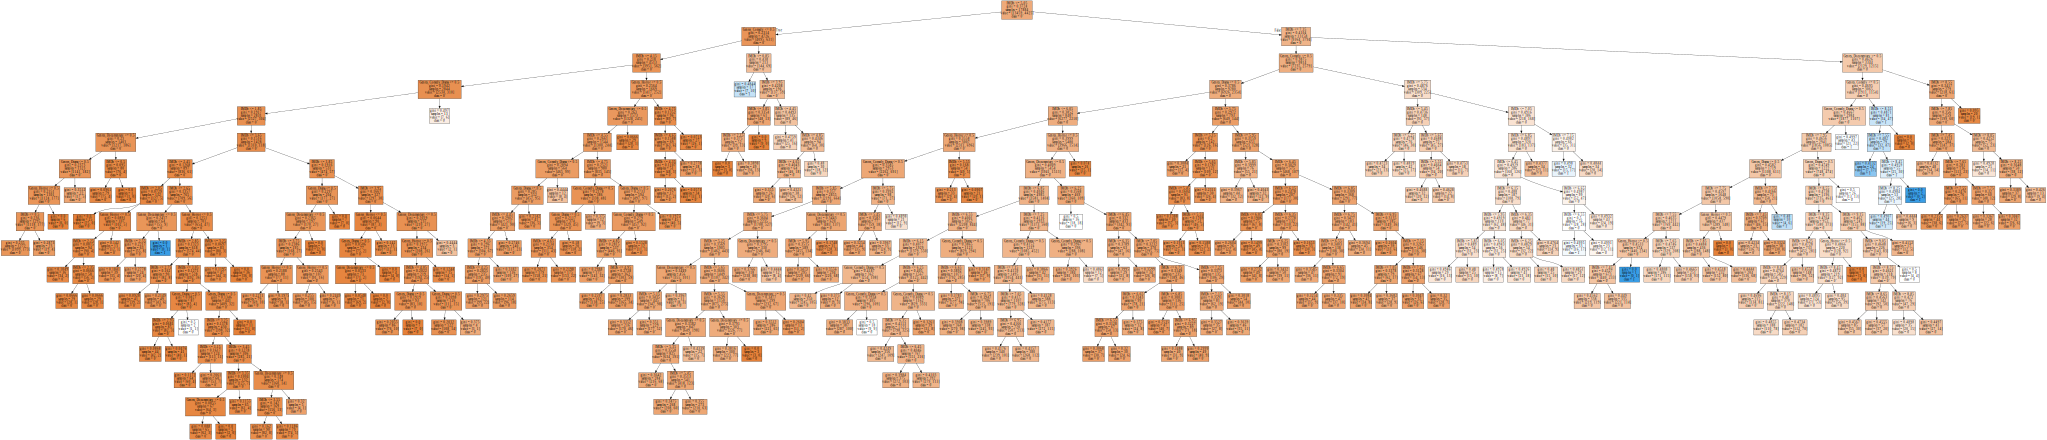

In [244]:
dot_data = tree.export_graphviz(tree1,feature_names = X_train.columns,class_names=["0","1"], filled=True, precision=4)
graph = graphviz.Source(dot_data, format="png") 
graph

In [245]:
from sklearn.metrics import accuracy_score

In [246]:
train_score_1 = accuracy_score(y_train, y_pred_t1)*100
train_score_1

75.41936926862

In [247]:
train_score_2 = accuracy_score(y_train, y_pred_t2)*100
train_score_2

75.503243122344

In [248]:
test_score_1 = accuracy_score(y_test, y_pred1)*100
test_score_1

76.29165734734958

In [249]:
test_score_2 = accuracy_score(y_test, y_pred2)*100
test_score_2

76.00089465443972

In [250]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.77      0.99      0.86      3405
           1       0.56      0.03      0.05      1066

    accuracy                           0.76      4471
   macro avg       0.66      0.51      0.46      4471
weighted avg       0.72      0.76      0.67      4471



In [253]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.76      0.99      0.86      3405
           1       0.44      0.02      0.04      1066

    accuracy                           0.76      4471
   macro avg       0.60      0.51      0.45      4471
weighted avg       0.69      0.76      0.67      4471



In [252]:
cm1 = confusion_matrix(y_test, y_pred1)
cm1

array([[3381,   24],
       [1036,   30]], dtype=int64)